5.659960204152044
Recovery time: mean = 6.501, std = 4.112


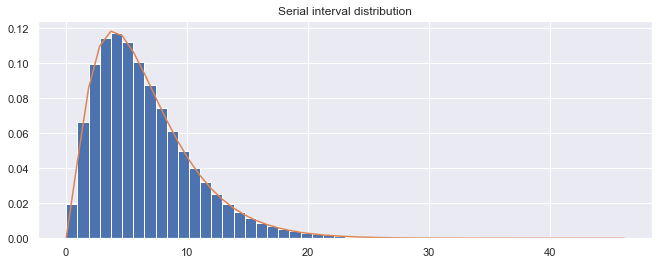

In [106]:
import sys
import numpy as np
import scipy.special as sps
import scipy.stats as st
import pickle
import pandas as pd
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import init_common as z
import init_spec_gamma as zz
import helpers as hp
from random import sample
from sklearn.utils import shuffle

sns.set(rc={'figure.figsize':(11, 4)})

R0_target = 2.2
bnum = 50
N_nodes = 1000000

## 1. add distribution for recovery time / gamma
Trec_mean  = 6.5 # serial interval
Trec_sig = 0.62
m0 = Trec_mean*(Trec_sig**2)
s0 = 1/(Trec_sig**2)
Trec_vec = np.random.gamma(m0,s0,N_nodes)
Trec_mean = np.average(Trec_vec)
med = np.median(Trec_vec)
gamma_mean = 1/Trec_mean 
cnt,bins,ign=plt.hist(Trec_vec,bins=bnum,density=True)
plt.plot(bins,st.gamma.pdf(bins,m0,0,s0))
plt.title("Serial interval distribution")
plt.savefig("./calib/Serial_interval_pdf.png")

print("Recovery time: mean = "+str(np.round(Trec_mean,3))+", std = "+str(np.round(np.std(Trec_vec),3))+
     ", median = "+str(np.round(med,3)))


R0 for self-isolated: mean = 0.99, std = 0.099


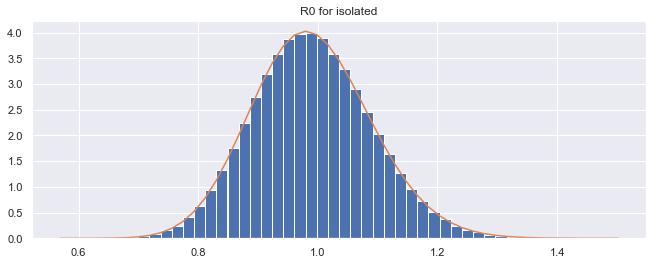

In [146]:
## 2.add distribution for R0 
## 2.A self-isolated
isol_share = 0.7
N_nodes_isol = round(isol_share*N_nodes)
# their R0 follows gamma dist. with very small variance
R0_scale = 100 #10**2
R0_isol_mean = 3.96*0.25
m0 = R0_scale*R0_isol_mean
s0 = 1/R0_scale
R0_isol_vec = np.random.gamma(m0,s0,N_nodes_isol)

print("R0 for self-isolated: mean = "+str(np.round(np.mean(R0_isol_vec),3))+
      ", std = "+str(np.round(np.std(R0_isol_vec),3)))

cnt,bins,ign=plt.hist(R0_isol_vec,bins=bnum,density=True)
plt.plot(bins,st.gamma.pdf(bins,m0,0,s0))
#plt.plot(bins,st.gamma.pdf(bins,params[0],params[1],params[2]))
#print("Parameters of fitted Gamma dist:")
plt.title("R0 for isolated")
plt.savefig("./calib/R0_isol_pdf.png")

R0 for non-isolated: mean = 2.624, std = 2.128


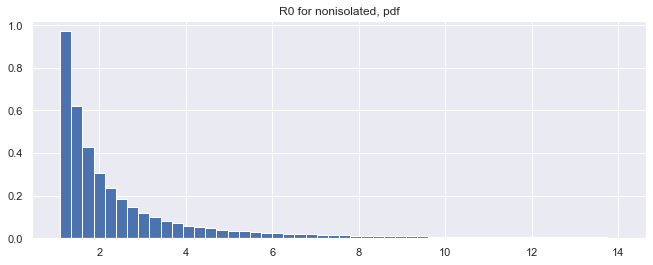

In [155]:
## 2.B non-isolated
a0 = R0_isol_mean+np.std(R0_isol_vec)
a1 = 14
scale_nonisol = 2.3
N_nodes_nonisol = N_nodes-N_nodes_isol
R0_nonisol_vec = hp.power_law_pdf(np.random.uniform(0,1,N_nodes_nonisol),a0,a1,scale_nonisol)
cnt,bins,ign=plt.hist(R0_nonisol_vec,bins=bnum,density=True)
plt.title("R0 for nonisolated, pdf")
plt.savefig("./calib/R0_nonisol_pdf.png")

print("R0 for non-isolated: mean = "+str(np.round(np.mean(R0_nonisol_vec),3))+
      ", std = "+str(np.round(np.std(R0_nonisol_vec),3)))


R0 (total pop.): mean = 1.48, std = 1.388


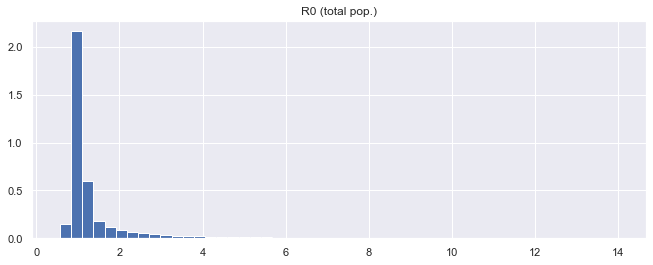

In [156]:
## 2.C joint distribution
R0_vec = shuffle(np.transpose([*np.transpose(R0_isol_vec),*np.transpose(R0_nonisol_vec)]),random_state=0)
R0_vec_list = R0_vec.tolist()

#R0_vec = beta_vec*Trec_vec
R0_mean = np.mean(R0_vec)
R0_std = np.std(R0_vec)

print("R0 (total pop.): mean = "+str(np.round(R0_mean,3))+
      ", std = "+str(np.round(R0_std,3)))
cnt,bins,ign=plt.hist(R0_vec,bins=bnum,density=True)
plt.title("R0 (total pop.)")
plt.savefig("./calib/R0_pdf.png")


Text(0.5, 1.0, 'Beta, pdf')

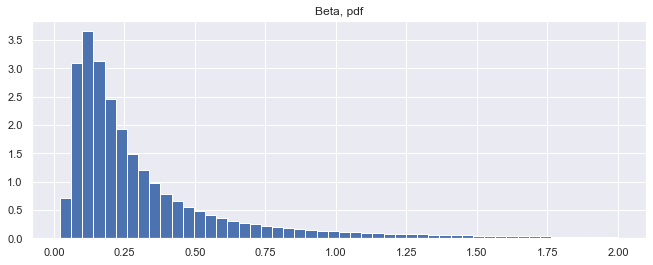

In [62]:
## 3. exctract Beta
Beta_vec = R0_vec/Trec_vec
Beta_vec = Beta_vec[Beta_vec<2]
cnt,bins,ign=plt.hist(Beta_vec,bins=bnum,density=True)
plt.title("Beta, pdf")

Text(0.5, 1.0, 'Beta, pdf')

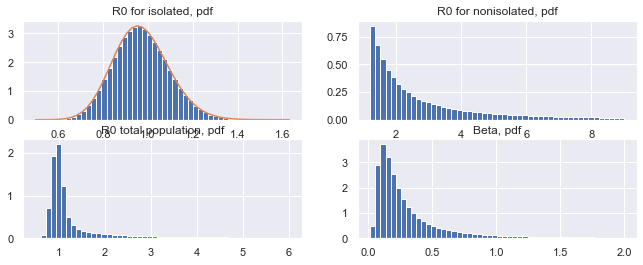

In [58]:
## plotting
plt.subplot(221)
cnt,bins,ign=plt.hist(R0_isol_vec,bins=bnum,density=True)
plt.plot(bins,st.gamma.pdf(bins,m0,0,s0))
plt.title("R0 for isolated, pdf")

plt.subplot(222)
R0_max=9
R0_nonisol_vec0 = R0_nonisol_vec[R0_nonisol_vec<R0_max]
cnt,bins,ign=plt.hist(R0_nonisol_vec0,bins=bnum,density=True)
plt.title("R0 for nonisolated, pdf")

plt.subplot(223)
R0_vec0 = R0_vec[R0_vec<6]
cnt,bins,ign=plt.hist(R0_vec0,bins=bnum,density=True)
plt.title("R0 total population, pdf")

plt.subplot(224)
Beta_vec = Beta_vec[Beta_vec<2]
cnt,bins,ign=plt.hist(Beta_vec,bins=bnum,density=True)
plt.title("Beta, pdf")